### Import Libraries

In [133]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Bidirectional

### Load Data

In [91]:
# Load the data
data = pd.read_csv('INFY.NS.csv', parse_dates=['Date'], index_col='Date')
data.dropna(inplace=True)

# Filter for the last 5 years of data
data = data['Close']  # Only need the closing prices
last_5_years_data = data.loc[data.index[-1] - pd.DateOffset(years=5):]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(last_5_years_data.values.reshape(-1, 1))

# Set prediction window
prediction_days = 60  # Use 60 days (about 2 months) of data to predict the next step

# Prepare training data
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### RNN

In [115]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dense(units=1))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0345
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.2092e-04
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.7155e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0017e-04
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.7493e-04
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2074e-04
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.5242e-04
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.0034e-04
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8700e-04
Epoch 10/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2.1582e-04
Epoch 11/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.3625e-04
Epoch 12/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2205e-04
Epoch 13/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9367e-04
Epoch 14/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.2738e-04
Epoch 15/30
37/37 ━━━━━━━━━━━━

### LSTM

In [117]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0643
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.9749e-04
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.3148e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.7319e-04
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 6.1193e-04
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 5.2715e-04
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 5.8634e-04
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.1662e-04
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5.5763e-04
Epoch 10/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.6021e-04
Epoch 11/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 5.3485e-04
Epoch 12/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.9947e-04
Epoch 13/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 5.5356e-04
Epoch 14/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 4.5788e-04
Epoch 15/30
37/37 ━

### BI-LSTM

In [122]:
model_bi_lstm = Sequential()
model_bi_lstm.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model_bi_lstm.add(Bidirectional(LSTM(units=50)))
model_bi_lstm.add(Dense(units=1))

model_bi_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_bi_lstm.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0388
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0014
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 9.5801e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 7.6585e-04
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 6.8609e-04
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4.7374e-04
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.0677e-04
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4.1788e-04
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 3.8050e-04
Epoch 10/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 3.9603e-04
Epoch 11/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 3.9802e-04
Epoch 12/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 3.4289e-04
Epoch 13/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 3.5779e-04
Epoch 14/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 3.1666e-04
Epoch 15/30
37/37 ━━━━━

### Predictions

In [123]:
def predict_future(model, days_to_predict, last_data):
    predictions = []
    input_data = last_data[-prediction_days:]
    input_data = input_data.reshape(1, prediction_days, 1)  # Shape (1, prediction_days, 1)

    for _ in range(days_to_predict):
        pred = model.predict(input_data)  # Shape (1, 1)
        predictions.append(pred[0, 0])
        
        # Reshape pred to (1, 1, 1) before appending
        pred_reshaped = np.reshape(pred, (1, 1, 1))
        input_data = np.append(input_data[:, 1:, :], pred_reshaped, axis=1)

    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [124]:
last_data = scaled_data[-prediction_days:] 
one_month_pred_rnn = predict_future(model_rnn, 30, scaled_data)
six_months_pred_rnn = predict_future(model_rnn, 180, scaled_data)
one_year_pred_rnn = predict_future(model_rnn, 365, scaled_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━

In [125]:
one_month_pred_lstm = predict_future(model_lstm, 30, scaled_data)
six_months_pred_lstm = predict_future(model_lstm, 180, last_data)
one_year_pred_lstm = predict_future(model_lstm, 365, last_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━

In [126]:
one_month_pred_blstm = predict_future(model_bi_lstm, 30, scaled_data)
six_months_pred_blstm = predict_future(model_bi_lstm, 180, last_data)
one_year_pred_blstm = predict_future(model_bi_lstm, 365, last_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

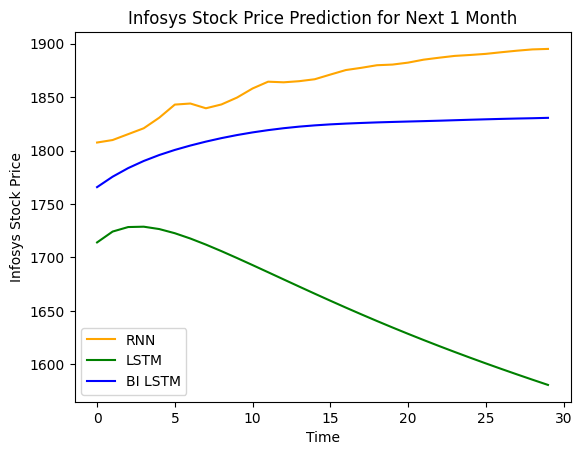

In [132]:
plt.plot(one_month_pred_rnn, color='orange', label='RNN')
plt.plot(one_month_pred_lstm, color='green', label='LSTM')
plt.plot(one_month_pred_blstm, color='blue', label='BI LSTM')
plt.title('Infosys Stock Price Prediction for Next 1 Month')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()

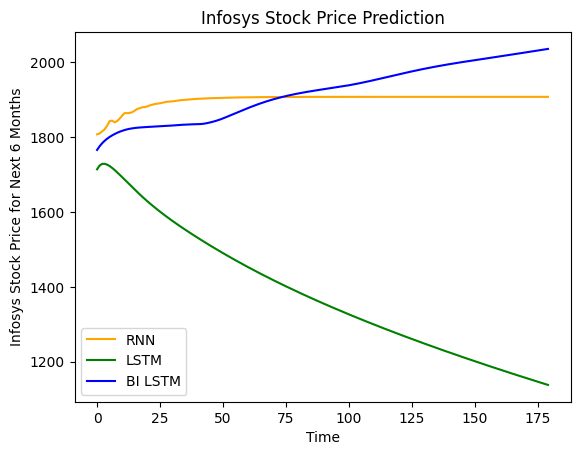

In [129]:
plt.plot(six_months_pred_rnn, color='orange', label='RNN')
plt.plot(six_months_pred_lstm, color='green', label='LSTM')
plt.plot(six_months_pred_blstm, color='blue', label='BI LSTM')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price for Next 6 Months')
plt.legend()

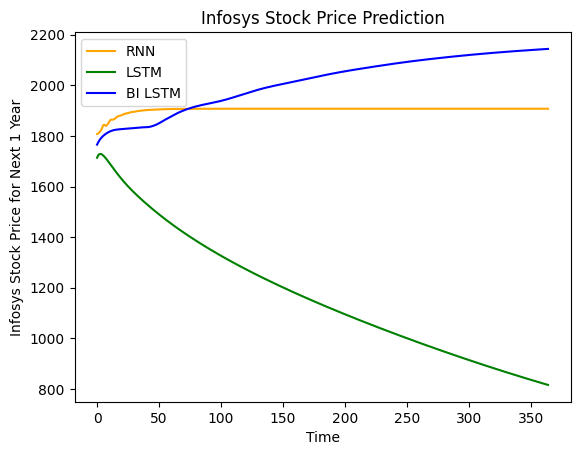

In [128]:
plt.plot(one_year_pred_rnn, color='orange', label='RNN')
plt.plot(one_year_pred_lstm, color='green', label='LSTM')
plt.plot(one_year_pred_blstm, color='blue', label='BI LSTM')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price for Next 1 Year')
plt.legend()

In [141]:
print("1 Month Closing Price ->")
print("RNN: ",one_month_pred_rnn[-1][0])
print("LSTM: ",one_month_pred_lstm[-1][0])
print("Bi-LSTM: ",one_month_pred_blstm[-1][0])

print("\n6 Month Closing Price ->")
print("RNN: ", six_months_pred_rnn[-1][0])
print("LSTM: ", six_months_pred_lstm[-1][0])
print("Bi-LSTM: ", six_months_pred_blstm[-1][0])

print("\n1 Year Closing Price ->")
print("RNN: ", one_year_pred_rnn[-1][0])
print("LSTM: ", one_year_pred_lstm[-1][0])
print("Bi-LSTM: ", one_year_pred_blstm[-1][0])

1 Month Closing Price ->
RNN:  1895.1145
LSTM:  1580.6542
Bi-LSTM:  1830.6107

6 Month Closing Price ->
RNN:  1907.666
LSTM:  1138.083
Bi-LSTM:  2035.6655

1 Year Closing Price ->
RNN:  1907.6669
LSTM:  815.7135
Bi-LSTM:  2144.0916
